In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import ChainedImputer

%matplotlib inline

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Load Data

In [2]:
train_2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print(train_2016.shape)
train_2016.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [3]:
property_2016 = pd.read_csv("properties_2016.csv")
print(property_2016.shape)
property_2016.tail()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

### parse date

In [4]:
train_2016["transactionyear"] = train_2016["transactiondate"].dt.year
train_2016["transactionmonth"] = train_2016["transactiondate"].dt.month
train_2016["transactionday"] = train_2016["transactiondate"].dt.day

train_2016.head()

,parcelid,logerror,transactiondate,transactionyear,transactionmonth,transactionday
0,11016594,0.0276,2016-01-01,2016,1,1
1,14366692,-0.1684,2016-01-01,2016,1,1
2,12098116,-0.0040,2016-01-01,2016,1,1
3,12643413,0.0218,2016-01-02,2016,1,2
4,14432541,-0.0050,2016-01-02,2016,1,2


### join data ( train_2016 & property_2016 )
- make train data

In [5]:
train = train_2016.set_index("parcelid").join(property_2016.set_index("parcelid"))
print(train.shape)
train.head()

(90275, 62)


,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,2016,8,2,1.0,NaN,NaN,3.0,4.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,2016,8,2,1.0,NaN,NaN,3.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,2016,5,3,1.0,NaN,NaN,2.0,3.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,2016,4,5,1.0,NaN,NaN,2.0,4.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,2016,7,15,1.0,NaN,NaN,2.0,4.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


### fill NaN for train data
- object type value preprocessing
- float, int type value preprocessing

In [6]:
print(len(train.dtypes[train.dtypes == object]))
train.dtypes[train.dtypes == object]

5


hashottuborspa               object
propertycountylandusecode    object
propertyzoningdesc           object
fireplaceflag                object
taxdelinquencyflag           object
dtype: object

In [7]:
object_columns = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
print(train[object_columns].shape)
train[object_columns].head()

(90275, 5)


,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
parcelid,,,,,
10711738,NaN,0101,LARE11,NaN,NaN
10711755,NaN,0101,LARE11,NaN,NaN
10711805,NaN,0101,LARE9,NaN,NaN
10711816,NaN,0100,LARE9,NaN,NaN
10711858,NaN,0101,LARE9,NaN,NaN


- hashottuborspa : True or False
- propertycountylandusecode : 240 types
- propertyzoningdesc : 5638 types
- fireplaceflag : True or False
- taxdelinquencyflag : Y / N

**fill nan**
- hashottuborspa : True or False  ----------------------------->    True = 1, NaN = 0(False)
- fireplaceflag : True or False     ----------------------------->   True = 1, NaN = 0(False)
- taxdelinquencyflag : Y / N           ----------------------------->   Y = 1, NaN = 0(N)
- propertycountylandusecode : not yet preprocessing
- propertyzoningdesc : not yet preprocessing


In [8]:
# hashottuborspa
train.loc[~train["hashottuborspa"].isna(), "hashottuborspa"] = 1
train.loc[train["hashottuborspa"].isna(), "hashottuborspa"] = 0

train[train["hashottuborspa"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [9]:
# fireplaceflag
train.loc[~train["fireplaceflag"].isna(), "fireplaceflag"] = 1
train.loc[train["fireplaceflag"].isna(), "fireplaceflag"] = 0

train[train["fireplaceflag"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [10]:
# taxdelinquencyflag
train.loc[~train["taxdelinquencyflag"].isna(), "taxdelinquencyflag"] = 1
train.loc[train["taxdelinquencyflag"].isna(), "taxdelinquencyflag"] = 0

train[train["taxdelinquencyflag"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [11]:
train[object_columns].dtypes

hashottuborspa                int64
propertycountylandusecode    object
propertyzoningdesc           object
fireplaceflag                 int64
taxdelinquencyflag            int64
dtype: object

In [12]:
# propertycountylandusecode

In [13]:
# propertyzoningdesc

In [14]:
print(len(train.dtypes[train.dtypes != object]))
train.dtypes[train.dtypes != object]

60


logerror                               float64
transactiondate                 datetime64[ns]
transactionyear                          int64
transactionmonth                         int64
transactionday                           int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips         

### all of assessmentyear value is 2015.0, it means that assessmentyear has not effect for logerror

In [15]:
execept_columns = ["assessmentyear", "propertycountylandusecode", "propertyzoningdesc"]
category_columns = ["airconditioningtypeid", "architecturalstyletypeid", "buildingclasstypeid",\
                    "buildingqualitytypeid", "decktypeid", "fips", "fireplaceflag", "hashottuborspa",\
                    "heatingorsystemtypeid", "pooltypeid10", "pooltypeid2", "pooltypeid7",\
                    "propertylandusetypeid", "rawcensustractandblock", "censustractandblock",\
                    "regionidcounty", "regionidcity", "regionidzip", "regionidneighborhood", "storytypeid",\
                    "typeconstructiontypeid", "unitcnt", "yearbuilt", "taxdelinquencyflag", "taxdelinquencyyear"]
scalar_columns = ["basementsqft", "bathroomcnt", "bedroomcnt", "calculatedbathnbr", "threequarterbathnbr",\
                  "finishedfloor1squarefeet", "calculatedfinishedsquarefeet", "finishedsquarefeet6", "finishedsquarefeet12",\
                  "finishedsquarefeet13", "finishedsquarefeet15", "finishedsquarefeet50", "fireplacecnt",\
                  "fullbathcnt", "garagecarcnt", "garagetotalsqft", "latitude", "longitude", "lotsizesquarefeet",\
                  "numberofstories", "poolcnt", "poolsizesum", "roomcnt", "yardbuildingsqft17", "yardbuildingsqft26",\
                  "taxvaluedollarcnt", "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt", "taxamount"]
dates_columns = ["transactionyear", "transactionmonth", "transactionday"]

len(execept_columns) + len(category_columns) + len(scalar_columns) + len(dates_columns) # + logerror , transactiondate

60

In [16]:
print(train[category_columns].shape)
train[category_columns].head()

(90275, 25)


,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,buildingqualitytypeid,decktypeid,fips,fireplaceflag,hashottuborspa,heatingorsystemtypeid,pooltypeid10,...,regionidcounty,regionidcity,regionidzip,regionidneighborhood,storytypeid,typeconstructiontypeid,unitcnt,yearbuilt,taxdelinquencyflag,taxdelinquencyyear
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,1.0,NaN,NaN,4.0,NaN,6037.0,0,0,2.0,NaN,...,3101.0,12447.0,96339.0,268588.0,NaN,NaN,1.0,1978.0,0,NaN
10711755,1.0,NaN,NaN,4.0,NaN,6037.0,0,0,2.0,NaN,...,3101.0,12447.0,96339.0,268588.0,NaN,NaN,1.0,1959.0,0,NaN
10711805,1.0,NaN,NaN,4.0,NaN,6037.0,0,0,2.0,NaN,...,3101.0,12447.0,96339.0,268588.0,NaN,NaN,1.0,1973.0,0,NaN
10711816,1.0,NaN,NaN,4.0,NaN,6037.0,0,0,2.0,NaN,...,3101.0,12447.0,96339.0,268588.0,NaN,NaN,1.0,1973.0,0,NaN
10711858,1.0,NaN,NaN,4.0,NaN,6037.0,0,0,2.0,NaN,...,3101.0,12447.0,96339.0,268588.0,NaN,NaN,1.0,1973.0,0,NaN


### category type datas are filled using most frequent value, if rate of NaN is over 50% of data, then NaN impute 0.

In [17]:
nan_c_train = train[category_columns].isnull().sum(axis=0).reset_index()
nan_c_train.columns = ["columns_name", "missing_counts"]
nan_c_train = nan_c_train.sort_values(by="missing_counts")

Text(0.5,1,'Number of missing values in each category column')

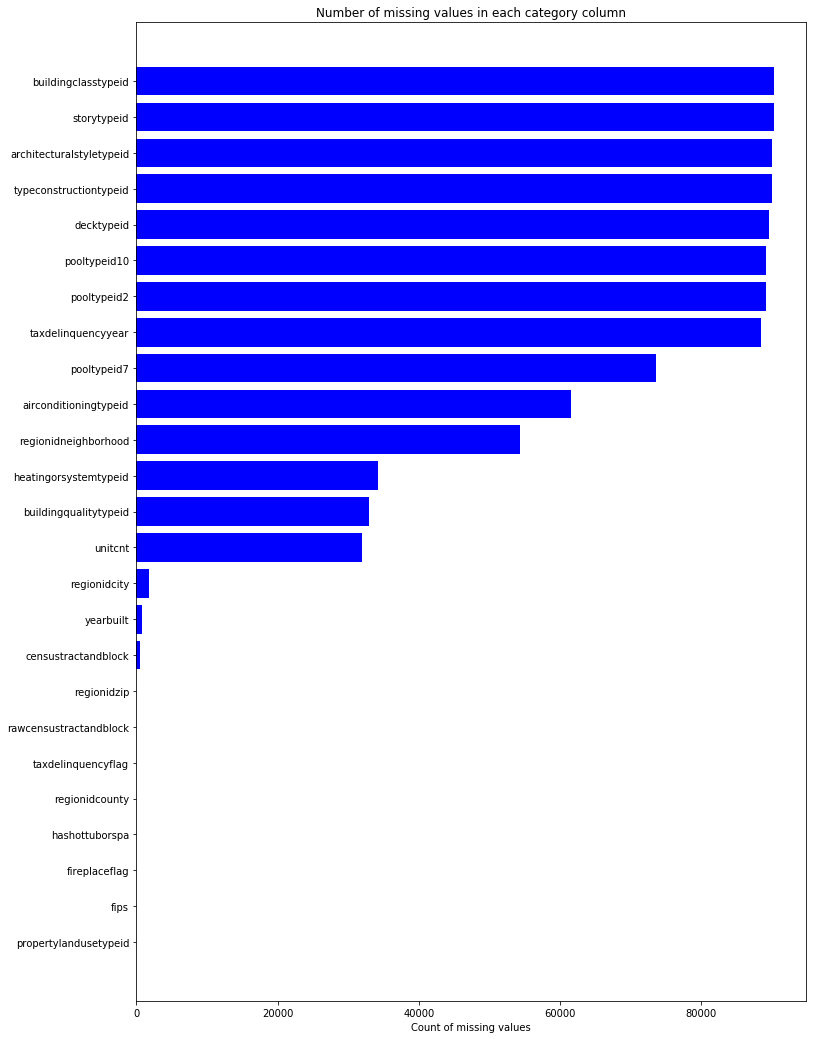

In [18]:
fig, ax = plt.subplots(figsize=(12,18))
ax.barh(np.arange(nan_c_train.shape[0]), nan_c_train.missing_counts.values, color='blue')
ax.set_yticks(np.arange(nan_c_train.shape[0]))
ax.set_yticklabels(nan_c_train.columns_name.values, rotation="horizontal")
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each category column")

In [19]:
nan_c_train["rateofNaN"] = nan_c_train["missing_counts"] / 90275
nan_c_train[nan_c_train["rateofNaN"] > 0.5]

,columns_name,missing_counts,rateofNaN
18,regionidneighborhood,54263,0.601086
0,airconditioningtypeid,61494,0.681185
11,pooltypeid7,73578,0.815043
24,taxdelinquencyyear,88492,0.980249
10,pooltypeid2,89071,0.986663
9,pooltypeid10,89114,0.987139
4,decktypeid,89617,0.992711
20,typeconstructiontypeid,89976,0.996688
1,architecturalstyletypeid,90014,0.997109
19,storytypeid,90232,0.999524


In [20]:
impute_zero_ls = nan_c_train[nan_c_train["rateofNaN"] > 0.5]["columns_name"].values
impute_zero_ls

array(['regionidneighborhood', 'airconditioningtypeid', 'pooltypeid7',
       'taxdelinquencyyear', 'pooltypeid2', 'pooltypeid10', 'decktypeid',
       'typeconstructiontypeid', 'architecturalstyletypeid',
       'storytypeid', 'buildingclasstypeid'], dtype=object)

In [21]:
train[impute_zero_ls].isna().sum()

regionidneighborhood        54263
airconditioningtypeid       61494
pooltypeid7                 73578
taxdelinquencyyear          88492
pooltypeid2                 89071
pooltypeid10                89114
decktypeid                  89617
typeconstructiontypeid      89976
architecturalstyletypeid    90014
storytypeid                 90232
buildingclasstypeid         90259
dtype: int64

In [22]:
train[impute_zero_ls] = train[impute_zero_ls].fillna(0.0)
train[impute_zero_ls].isna().sum()

regionidneighborhood        0
airconditioningtypeid       0
pooltypeid7                 0
taxdelinquencyyear          0
pooltypeid2                 0
pooltypeid10                0
decktypeid                  0
typeconstructiontypeid      0
architecturalstyletypeid    0
storytypeid                 0
buildingclasstypeid         0
dtype: int64

In [23]:
train["buildingqualitytypeid"].value_counts()

7.0     29310
4.0     23839
1.0      2627
10.0     1461
12.0      119
8.0         5
6.0         2
11.0        1
Name: buildingqualitytypeid, dtype: int64

In [24]:
train.loc[train["buildingqualitytypeid"].isna(), "buildingqualitytypeid"] = 7.0
train[train["buildingqualitytypeid"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [25]:
train["heatingorsystemtypeid"].value_counts()

2.0     38303
7.0     15519
24.0     1071
6.0       970
20.0       97
13.0       76
18.0       25
1.0        13
14.0        2
10.0        2
11.0        1
12.0        1
Name: heatingorsystemtypeid, dtype: int64

In [26]:
train.loc[train["heatingorsystemtypeid"].isna(), "heatingorsystemtypeid"] = 2.0
train[train["heatingorsystemtypeid"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [27]:
train["censustractandblock"].value_counts().head()

6.037920e+13    62
6.059032e+13    59
6.037137e+13    49
6.059063e+13    46
6.037277e+13    45
Name: censustractandblock, dtype: int64

In [28]:
train.loc[train["censustractandblock"].isna(), "censustractandblock"] = 6.037920e+13
train[train["censustractandblock"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [29]:
train["regionidcity"].value_counts().head()

12447.0    20559
46298.0     3000
52650.0     2132
54311.0     2128
5534.0      2035
Name: regionidcity, dtype: int64

In [30]:
train.loc[train["regionidcity"].isna(), "regionidcity"] = 12447.0
train[train["regionidcity"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [31]:
train["regionidzip"].value_counts().head()

97319.0    912
96987.0    902
96974.0    824
97329.0    760
97318.0    726
Name: regionidzip, dtype: int64

In [32]:
train.loc[train["regionidzip"].isna(), "regionidzip"] = 97319.0
train[train["regionidzip"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [33]:
train["unitcnt"].value_counts()

1.0      54503
2.0       2354
4.0        871
3.0        619
6.0          1
5.0          1
9.0          1
11.0         1
143.0        1
70.0         1
Name: unitcnt, dtype: int64

In [34]:
train.loc[train["unitcnt"].isna(), "unitcnt"] = 1.0
train[train["unitcnt"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [35]:
train["yearbuilt"].value_counts().head()

1955.0    2261
1989.0    2058
1950.0    1994
1954.0    1940
1964.0    1919
Name: yearbuilt, dtype: int64

In [36]:
train.loc[train["yearbuilt"].isna(), "yearbuilt"] = 1955.0
train[train["yearbuilt"].isna()]

,logerror,transactiondate,transactionyear,transactionmonth,transactionday,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,


In [37]:
train[category_columns].isna().sum()

airconditioningtypeid       0
architecturalstyletypeid    0
buildingclasstypeid         0
buildingqualitytypeid       0
decktypeid                  0
fips                        0
fireplaceflag               0
hashottuborspa              0
heatingorsystemtypeid       0
pooltypeid10                0
pooltypeid2                 0
pooltypeid7                 0
propertylandusetypeid       0
rawcensustractandblock      0
censustractandblock         0
regionidcounty              0
regionidcity                0
regionidzip                 0
regionidneighborhood        0
storytypeid                 0
typeconstructiontypeid      0
unitcnt                     0
yearbuilt                   0
taxdelinquencyflag          0
taxdelinquencyyear          0
dtype: int64

### scalar type data impute using mean

In [38]:
imp = ChainedImputer(n_imputations=10, initial_strategy='mean')

In [39]:
s_imp = imp.fit_transform(train[scalar_columns])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/bayes.py:289: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1. / self.alpha_))
/usr/local/lib/python3.7/site-packages/sklearn/impute.py:628: RuntimeWarning: invalid value encountered in greater
  good_sigmas = sigmas > 0
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/bayes.py:289: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(sigmas_squared_data + (1. / self.alpha_))
/usr/local/lib/python3.7/site-packages/sklearn/impute.py:628: RuntimeWarning: invalid value encountered in greater
  good_sigmas = sigmas > 0


In [40]:
s_train = pd.DataFrame(s_imp, columns = scalar_columns, index = train.index.values)
s_train = round(s_train)
s_train.head()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,...,numberofstories,poolcnt,poolsizesum,roomcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
10711738,852.0,3.0,4.0,3.0,-0.0,5610.0,2538.0,2557.0,2538.0,1888.0,...,1.0,1.0,-7.0,0.0,-1828.0,-7765.0,567112.0,245180.0,321932.0,7219.0
10711755,20093.0,3.0,3.0,3.0,-0.0,-2111.0,1589.0,1565.0,1589.0,1378.0,...,1.0,1.0,1265.0,0.0,271.0,-2930.0,459844.0,254691.0,205153.0,6901.0
10711805,18452.0,2.0,3.0,2.0,-0.0,395.0,2411.0,2395.0,2411.0,1756.0,...,0.0,1.0,1387.0,0.0,1206.0,1759.0,384787.0,235114.0,149673.0,4877.0
10711816,1578.0,2.0,4.0,2.0,1.0,-1026.0,2232.0,2248.0,2232.0,2247.0,...,1.0,1.0,235.0,0.0,-515.0,2754.0,437176.0,262309.0,174867.0,5560.0
10711858,1817.0,2.0,4.0,2.0,0.0,8170.0,1882.0,1874.0,1882.0,2282.0,...,1.0,1.0,1343.0,0.0,976.0,12467.0,382055.0,232037.0,150018.0,4878.0


### poolcnt only has one value, therefore fill with 0.0 in NaN value column

In [54]:
train["poolcnt"].value_counts()

1.0    17901
Name: poolcnt, dtype: int64

In [41]:
s_train.loc[train["poolcnt"].isna(), "poolcnt"] = 0.0

In [42]:
X_train = pd.concat([train[category_columns], s_train], axis=1)
print(X_train.shape)
print(X_train.isna().sum())
X_train.head()

(90275, 54)
airconditioningtypeid           0
architecturalstyletypeid        0
buildingclasstypeid             0
buildingqualitytypeid           0
decktypeid                      0
fips                            0
fireplaceflag                   0
hashottuborspa                  0
heatingorsystemtypeid           0
pooltypeid10                    0
pooltypeid2                     0
pooltypeid7                     0
propertylandusetypeid           0
rawcensustractandblock          0
censustractandblock             0
regionidcounty                  0
regionidcity                    0
regionidzip                     0
regionidneighborhood            0
storytypeid                     0
typeconstructiontypeid          0
unitcnt                         0
yearbuilt                       0
taxdelinquencyflag              0
taxdelinquencyyear              0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
th

,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,buildingqualitytypeid,decktypeid,fips,fireplaceflag,hashottuborspa,heatingorsystemtypeid,pooltypeid10,...,numberofstories,poolcnt,poolsizesum,roomcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,1.0,0.0,0.0,4.0,0.0,6037.0,0,0,2.0,0.0,...,1.0,1.0,-7.0,0.0,-1828.0,-7765.0,567112.0,245180.0,321932.0,7219.0
10711755,1.0,0.0,0.0,4.0,0.0,6037.0,0,0,2.0,0.0,...,1.0,1.0,1265.0,0.0,271.0,-2930.0,459844.0,254691.0,205153.0,6901.0
10711805,1.0,0.0,0.0,4.0,0.0,6037.0,0,0,2.0,0.0,...,0.0,1.0,1387.0,0.0,1206.0,1759.0,384787.0,235114.0,149673.0,4877.0
10711816,1.0,0.0,0.0,4.0,0.0,6037.0,0,0,2.0,0.0,...,1.0,0.0,235.0,0.0,-515.0,2754.0,437176.0,262309.0,174867.0,5560.0
10711858,1.0,0.0,0.0,4.0,0.0,6037.0,0,0,2.0,0.0,...,1.0,1.0,1343.0,0.0,976.0,12467.0,382055.0,232037.0,150018.0,4878.0


### add dates columns

In [43]:
X_train["logerror"] = train["logerror"].values
X_train["transactionyear"] = train["transactionyear"].values
X_train["transactionmonth"] = train["transactionmonth"].values
X_train["transactionday"] = train["transactionday"].values

### all of columns is filled

In [44]:
X_train.isna().sum().sum()

0

## Visualizaion

- append logerror columns for correlation heatmap

In [45]:
category_columns.append("logerror")
scalar_columns.append("logerror")
dates_columns.append("logerror")

### Category data heatmap for correlation

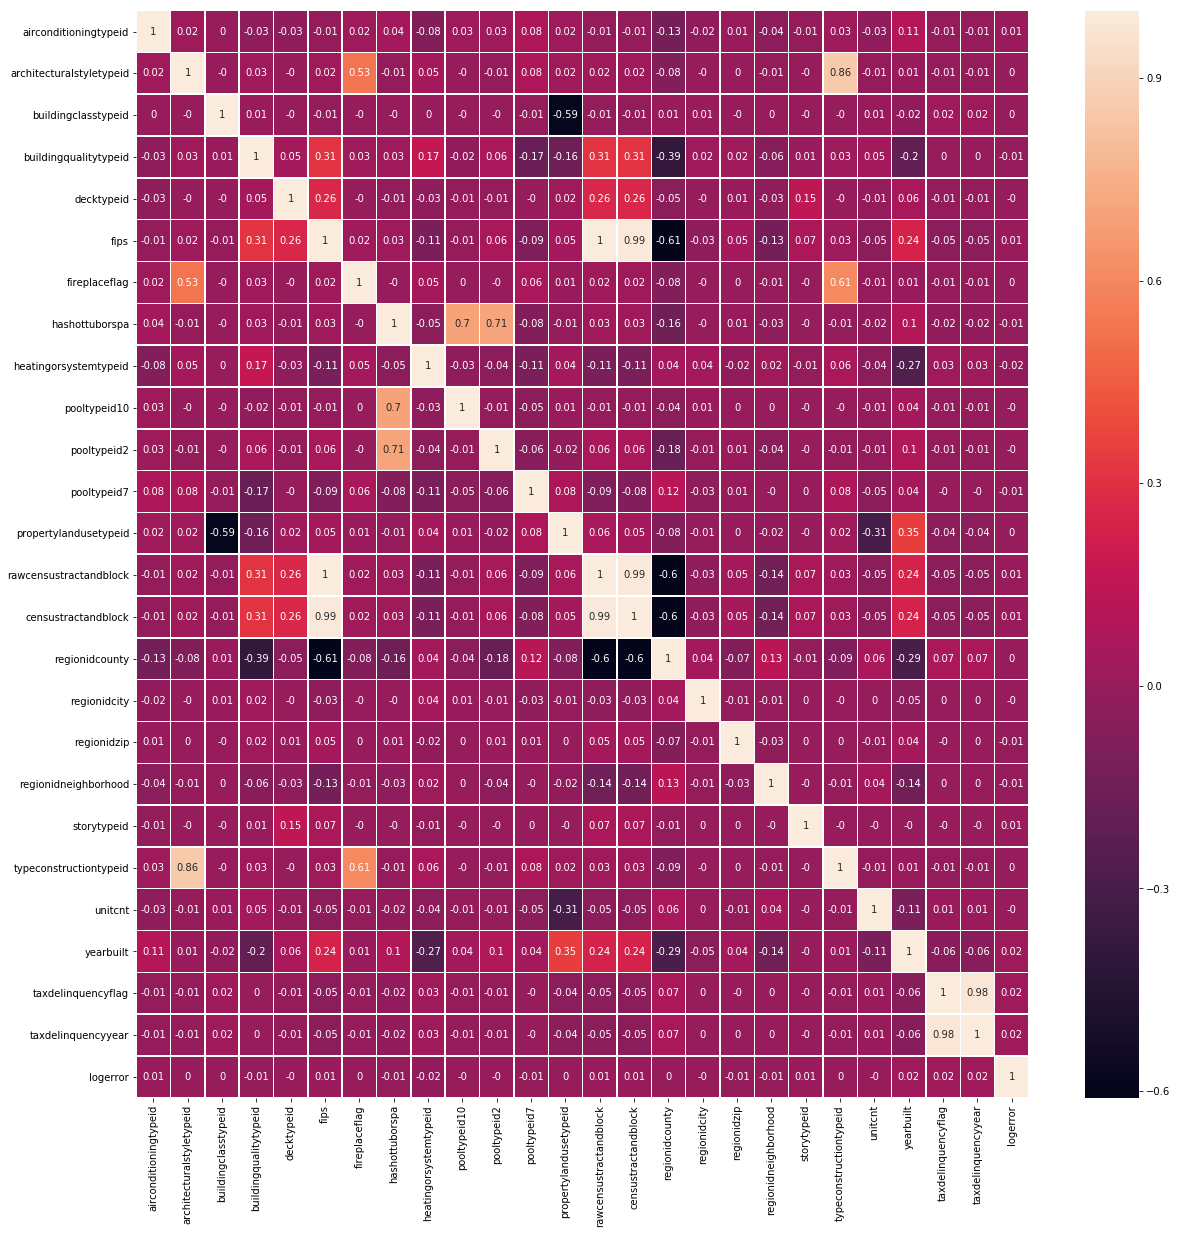

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(round(X_train[category_columns].corr(),2), linewidths=.5, annot=True, ax=ax)

### Scalar value data heatmap for correlation

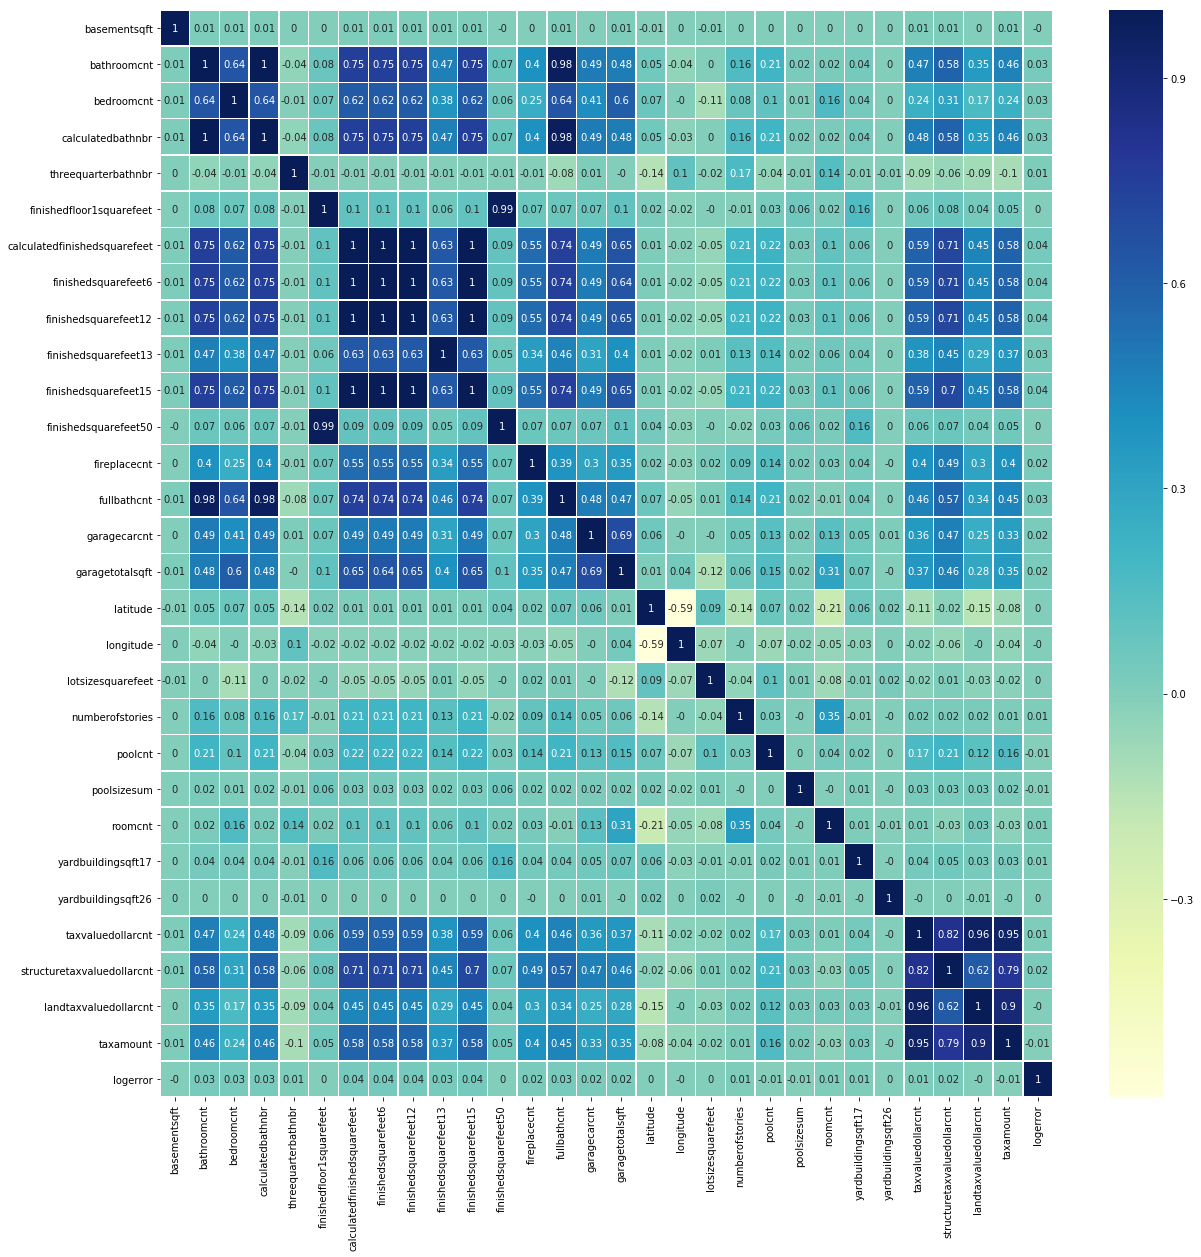

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(round(X_train[scalar_columns].corr(),2), linewidths=.5, annot=True, ax=ax, cmap="YlGnBu")

### Dates data heatmap for correlation

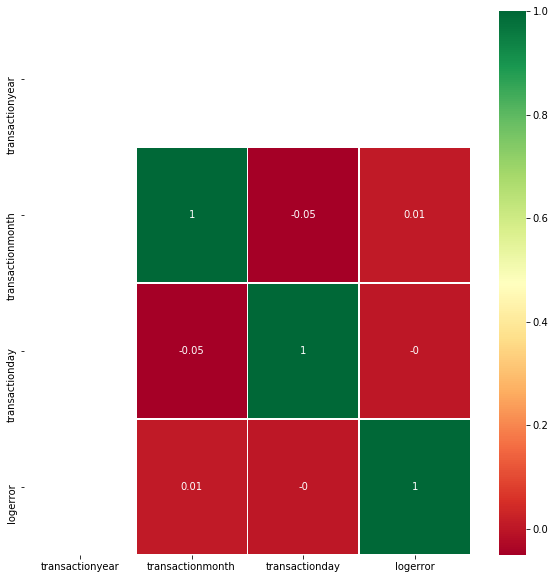

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(round(X_train[dates_columns].corr(),2), linewidths=.5, annot=True, ax=ax, cmap="RdYlGn")